# Exercices + Meilleur Kebab

In [1]:
!pip install unidecode
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unidecode import unidecode

In [26]:
url = 'https://www.lemonde.fr/actualite-en-continu/'
response = requests.get(url)
web_page = response.text

In [27]:
soup = BeautifulSoup(web_page, 'html.parser')

In [30]:
url = "https://www.lemonde.fr/actualite-en-continu/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

articles = soup.find_all("section", class_="teaser")
for article in articles:
    title = article.find("h3", class_="teaser__title").text.strip()
    chapeau = article.find("p", class_="teaser__desc").text.strip()
    print("Titre:", title)
    print("Chapeau:", chapeau)
    print()

Titre: Attentat près de Moscou : la branche de l’EI « impliquée » avait mené « plusieurs tentatives » en France, dit Emmanuel Macron
Chapeau: Selon le chef de l’Etat, les services de renseignement français estiment que l’organisation Etat islamique au Khorassan (EI-K) « a fomenté cet attentat et l’a mis à exécution ».

Titre: Plusieurs établissements scolaires visés par des menaces d’attentats dans l’académie de Reims
Chapeau: Samedi, ce sont dix collèges et lycées de l’académie d’Amiens – dans l’Aisne, l’Oise et la Somme – ainsi qu’une quinzaine d’établissements de l’académie de Lille qui ont été visés par des messages similaires, selon les rectorats concernés.

Titre: Une décision de justice ordonne le blocage de Telegram en Espagne
Chapeau: La plate-forme n’a pas donné suite aux réquisitions d’un juge dans une affaire de piratage de vidéos.

Titre: Emmanuel Macron face aux élus qui demandent un statut d’autonomie pour la Guyane
Chapeau: Le chef de l’Etat est en visite, lundi et mard

In [33]:
import os

if not os.path.exists("images"):
    os.makedirs("images")

url = "https://www.lemonde.fr/actualite-en-continu/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

articles = soup.find_all("section", class_="teaser")
for i, article in enumerate(articles, 1):
    title = article.find("h3", class_="teaser__title").text.strip()
    chapeau = article.find("p", class_="teaser__desc").text.strip()
    image_url = article.find("figure", class_="teaser__figure").find("img")["data-src"]
    
    image_response = requests.get(image_url)
    image_extension = image_url.split(".")[-1]
    image_filename = f"img/article_{i}.{image_extension}"
    with open(image_filename, "wb") as f:
        f.write(image_response.content)
    
    print("Titre:", title)
    print("Chapeau:", chapeau)
    print("Image enregistrée:", image_filename)
    print()

Titre: Attentat près de Moscou : la branche de l’EI « impliquée » avait mené « plusieurs tentatives » en France, dit Emmanuel Macron
Chapeau: Selon le chef de l’Etat, les services de renseignement français estiment que l’organisation Etat islamique au Khorassan (EI-K) « a fomenté cet attentat et l’a mis à exécution ».
Image enregistrée: img/article_1.jpg

Titre: Plusieurs établissements scolaires visés par des menaces d’attentats dans l’académie de Reims
Chapeau: Samedi, ce sont dix collèges et lycées de l’académie d’Amiens – dans l’Aisne, l’Oise et la Somme – ainsi qu’une quinzaine d’établissements de l’académie de Lille qui ont été visés par des messages similaires, selon les rectorats concernés.
Image enregistrée: img/article_2.JPG

Titre: Une décision de justice ordonne le blocage de Telegram en Espagne
Chapeau: La plate-forme n’a pas donné suite aux réquisitions d’un juge dans une affaire de piratage de vidéos.
Image enregistrée: img/article_3.JPG

Titre: Emmanuel Macron face aux 

Titre: Attentat près de Moscou : la France rehausse le plan Vigipirate au niveau « urgence attentat »
Chapeau: Gabriel Attal a annoncé cette mesure à l’issue d’un conseil de défense à l’Elysée, organisé deux jours après l’attentat terroriste près de Moscou, revendiqué par l’Etat islamique.
Image enregistrée: img/article_24.jpg

Titre: Sidaction 2024 : le montant des promesses de dons atteint 3,87 millions d’euros
Chapeau: L’édition 2023 avait récolté un montant similaire. La collecte, lancée vendredi avec le soutien de trente-cinq médias partenaires, reste ouverte jusqu’au 12 avril.
Image enregistrée: img/article_25.jpg

Titre: Brésil : arrestation des commanditaires présumés de l’assassinat de Marielle Franco
Chapeau: Trois notables de Rio de Janeiro, dont un député fédéral et l’ancien chef de la police locale, ont été incarcérés. Ils sont accusés d’être à l’origine de la mort de la conseillère municipale, une figure de la gauche carioca, abattue en mars 2018.
Image enregistrée: img/a

Titre: La « neuromanie », cette tendance à vouloir tout expliquer par le cerveau
Chapeau: Maîtriser nos émotions, apprendre mieux et plus vite, être épanoui au travail : nous attendons de plus en plus de l’observation de nos neurones. Au point que certains neuroscientifiques envahissent l’espace médiatique.
Image enregistrée: img/article_48.JPG

Titre: Au Nigeria, près de 140 élèves enlevés au début de mars par des hommes armés ont été libérés
Chapeau: Les écoliers sont « sains et saufs », a déclaré dimanche le gouverneur de l’Etat de Kaduna, sans préciser comment ils ont été libérés.
Image enregistrée: img/article_49.jpg

Titre: Isabelle Jonveaux, sociologue : « Le jeûne spirituel répond à une saturation de la société de consommation »
Chapeau: Au-delà du ramadan musulman ou du carême chrétien, le jeûne spirituel connaît un nouvel essor, selon Isabelle Jonveaux. La sociologue des religions analyse ces nouvelles pratiques de l’ascèse comme une recomposition du spirituel ainsi qu’une ré

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
url_depression = "https://en.wikipedia.org/wiki/Epidemiology_of_depression"
depression_df_list = pd.read_html(url_depression)

depression_df = depression_df_list[1] 

url_sunshine = "https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration"
sunshine_df_list = pd.read_html(url_sunshine)

sunshine_df = sunshine_df_list[1]  

In [44]:
print(sunshine_df.columns)

Index(['Country', 'City', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year', 'Ref.'],
      dtype='object')


In [45]:
average_sunshine_by_country = sunshine_df.groupby('Country')['Year'].mean().reset_index()

In [46]:
print(average_sunshine_by_country.head())

        Country         Year
0       Algeria  3266.500000
1        Angola  2341.000000
2         Benin  2630.466667
3      Botswana  3426.666667
4  Burkina Faso  3209.000000


In [47]:
----
----

SyntaxError: invalid syntax (2356718761.py, line 1)

### Meilleur Kebab

In [62]:
from bs4 import BeautifulSoup
import requests

url = "https://www.kebab-frites.com/meilleur-kebab/paris-d54.html#2022"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

noms = [h3.text.strip() for h3 in soup.select('article h3')[:20]]

adresses = [p.text.strip() for p in soup.select('article p')[:20]]

notes = []
for div in soup.select('article div[class^="stars"]')[:20]:
    classe = div.get('class')
    if len(classe) > 1 and classe[0] == 'stars':
        notes.append(classe[1])
    else:
        notes.append('Non noté')

for i in range(20):
    print(f"Restaurant {i+1}:")
    print(f"Nom: {noms[i]}")
    print(f"Adresse: {adresses[i]}")
    print(f"Note: {notes[i]}")
    print('---')


Restaurant 1:
Nom: #1 - Streaters
Adresse: 39 Rue Des Pyrénées Paris 2075020 Paris 20
Note: s6
---
Restaurant 2:
Nom: #2 - Casse Croute Grec - Chez Copain
Adresse: 4 rue de l'Ecole Polytechnique75005 Paris 05
Note: s5
---
Restaurant 3:
Nom: #3 - Mondial Kebab
Adresse: 190 Avenue de clichy75017 Paris 17
Note: s5
---
Restaurant 4:
Nom: #4 - Kebab Des Batignolles - L'original
Adresse: 43 Rue Des Batignolles75017 Paris 17
Note: s4
---
Restaurant 5:
Nom: #5 - Ozlem Snack
Adresse: 57 rue Petites Ecuries75010 Paris 10
Note: s5
---
Restaurant 6:
Nom: #6 - Délice Jussieu
Adresse: 4 rue Linné75005 Paris 05
Note: s6
---
Restaurant 7:
Nom: #7 - Restaurant Adana
Adresse: 190 Rue de Crimée75019 Paris 19
Note: s5
---
Restaurant 8:
Nom: #8 - Taksim
Adresse: 170 avenue Jean Jaures75019 Paris 19
Note: s6
---
Restaurant 9:
Nom: #9 - Repère Gourmand
Adresse: 31 Boulevard Murat75016 Paris 16
Note: s5
---
Restaurant 10:
Nom: #10 - Ephès
Adresse: 110 Rue Raymond Losserand75014 Paris 14
Note: s5
---
Restauran

In [65]:
avis_elements = soup.select('article div.avis')[:20]
avis_list = [avis.get_text(strip=True).replace(u'\xa0', u' ').split(' ')[0] for avis in avis_elements]

for index, avis in enumerate(avis_list, start=1):
    print(f"Avis pour le restaurant {index}: {avis}")

Avis pour le restaurant 1: 263
Avis pour le restaurant 2: 104
Avis pour le restaurant 3: 21
Avis pour le restaurant 4: 123
Avis pour le restaurant 5: 4
Avis pour le restaurant 6: 35
Avis pour le restaurant 7: 12
Avis pour le restaurant 8: 3
Avis pour le restaurant 9: 26
Avis pour le restaurant 10: 22
Avis pour le restaurant 11: 37
Avis pour le restaurant 12: 6
Avis pour le restaurant 13: 50
Avis pour le restaurant 14: 33
Avis pour le restaurant 15: 26
Avis pour le restaurant 16: 19
Avis pour le restaurant 17: 23
Avis pour le restaurant 18: 3
Avis pour le restaurant 19: 1
Avis pour le restaurant 20: 24


In [67]:
import pandas as pd

notes_num = pd.to_numeric(notes, errors='coerce')
avis_num = pd.to_numeric(avis_list, errors='coerce')

df = pd.DataFrame({
    'Nom': noms,
    'Adresse': adresses,
    'Note': notes_num,
    'Avis': avis_num
})

ValueError: All arrays must be of the same length

In [ ]:
df['Nom'] = df['Nom'].str.replace(r'#\d+\s', '', regex=True)

df['Rue'] = df['Adresse'].str.extract(r'(.+),\s75\d{3}\sParis\s\d{2}')
df['Arrondissement'] = df['Adresse'].str.extract(r'75(\d{3})')

df.drop('Adresse', axis=1, inplace=True)

df['Arrondissement'] = pd.to_numeric(df['Arrondissement'], errors='coerce')

In [ ]:
df.sort_values(by=['Note', 'Avis'], ascending=[False, False], inplace=True)

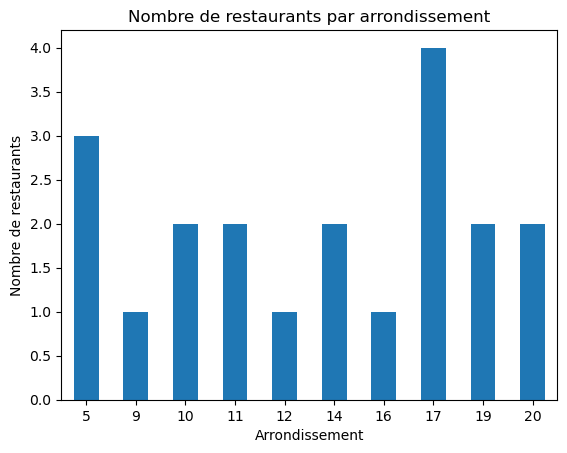

In [69]:
import matplotlib.pyplot as plt

restaurants_par_arr = df['Arrondissement'].value_counts()

restaurants_par_arr.sort_index().plot(kind='bar')
plt.title('Nombre de restaurants par arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Nombre de restaurants')
plt.xticks(rotation=0) 
plt.show()

In [70]:
print(df.head())

                                     Nom  Note  Avis  Rue  Arrondissement
0                            - Streaters   NaN   263  NaN              20
3   - Kebab Des Batignolles - L'original   NaN   123  NaN              17
1      - Casse Croute Grec - Chez Copain   NaN   104  NaN               5
12                      - La Voie Lactée   NaN    50  NaN               5
10                         - Buffet Dost   NaN    37  NaN              20


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nom             20 non-null     object 
 1   Note            0 non-null      float64
 2   Avis            20 non-null     int64  
 3   Rue             0 non-null      object 
 4   Arrondissement  20 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 960.0+ bytes
None


In [60]:
print(df.describe())

       Note        Avis  Arrondissement
count   0.0   20.000000       20.000000
mean    NaN   41.750000       13.400000
std     NaN   60.868171        5.009465
min     NaN    1.000000        5.000000
25%     NaN   10.500000       10.000000
50%     NaN   23.500000       14.000000
75%     NaN   35.500000       17.000000
max     NaN  263.000000       20.000000


In [68]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la page à scraper
url = "https://www.kebab-frites.com/meilleur-kebab/paris-d54.html#2022"

# Envoyer une requête HTTP à l'URL
response = requests.get(url)

# Parser le contenu HTML de la page avec BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Initialiser les listes pour stocker les données extraites
noms = []
adresses = []
notes = []
avis_list = []

# Trouver tous les articles qui correspondent aux restaurants pour l'année 2022
# Vous devrez trouver un moyen de filtrer ou de vérifier l'année si nécessaire
articles = soup.find_all('article')

for article in articles:
    # Extraire le nom, l'adresse et la note moyenne pour chaque restaurant
    nom = article.find('h3').get_text(strip=True)
    adresse = article.find('p').get_text(strip=True)
    note = article.select_one('.stars').get('class')[1]  # Exemple basé sur le nom de classe 'stars 5'
    avis = article.select_one('.avis').get_text(strip=True).split()[0]
    
    # Ajouter les données extraites dans les listes
    noms.append(nom)
    adresses.append(adresse)
    notes.append(note)
    avis_list.append(avis)

# Création d'un DataFrame avec les données extraites
df = pd.DataFrame({
    'Nom': noms,
    'Adresse': adresses,
    'Note': notes,
    'Avis': avis_list
})

AttributeError: 'NoneType' object has no attribute 'get'